In [ ]:
#!unzip Data_Train.csv.zip

# Building my own data set that contains
## features - text of articles

## category - category of article ( 'entertainment':0, 'politics and news': 1, 'culture and society':2, 'science and tech':3)

## label  - whether article is fake (0) or real (1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read fake articles ( all fake articles, scraped from www.snopes.com)
def read_file1():
  df_1 = pd.read_csv('snopes_phase2_raw_2018_7_3.csv')
  df_1 = df_1[['fact_rating_phase1', 'article_title_phase1', 'article_category_phase1', 'article_claim_phase1', 'original_article_text_phase2', 'article_title_phase2', ]]
  df_1['text'] = df_1['article_title_phase1'] + ' ' + df_1['article_claim_phase1'] + ' ' + df_1['original_article_text_phase2'] + ' ' + df_1['article_title_phase2']
  df_1['label'] = df_1['fact_rating_phase1']
  df_1['category'] = df_1['article_category_phase1']

  df_1.drop(columns=['article_title_phase1', 'fact_rating_phase1', 'article_claim_phase1', 'article_category_phase1', 'original_article_text_phase2', 'article_title_phase2'], inplace=True)
  df_1 = df_1.dropna(how='any')
  df_1['category'] = df_1['category'].str.lower().str.strip()

  society = ['hate', 'crime', 'rebellion', 'language', 'gays', 'superstition', 'culture', 'society', 'guns', 'racial', 'racist', 'violence', 'religion', 'history', 'fraud', 'agriculture', 'abortion']
  pattern = '|'.join(society)
  contains_society = df_1['category'].str.contains(pattern, case=False)
  df_1.loc[contains_society, 'category'] = 'culture and society'

  politics_values = ['politics', 'september 11th', 'war', 'military', 'war', 'immigration', 'hurricane', 'fake news', 'affairs', 'legal', 'media matters', 'politicians', 'elections', 'ballot box']
  pattern = '|'.join(politics_values)
  contains_politics = df_1['category'].str.contains(pattern, case=False)
  df_1.loc[contains_politics, 'category'] = 'politics and news'


  business_values = ['business', 'tech', 'automobiles', 'invest', 'science', 'medical', 'technology', 'computers', 'medical', 'medicaid', 'medicare', 'health']
  pattern = '|'.join(business_values)
  contains_business = df_1['category'].str.contains(pattern, case=False)
  df_1.loc[contains_business, 'category'] = 'science and tech'

  entertainment_values = ['viral', 'weddings', 'cokelore', 'critter', 'lost legends', 'controversy', 'embarrassments', 'glurge', 'sexuality', 'wives', 'travel', 'soapbox', 'humor', 'fauxtography','entertainment','sports', 'viral', 'college', 'quotes', 'conspiracy', 'holidays', 'food', 'quotes', 'horror', 'disney', 'computers', 'medical', 'entertainment', 'medicaid', 'medicare', 'health']
  pattern = '|'.join(entertainment_values)
  contains_entertainment = df_1['category'].str.contains(pattern, case=False)
  df_1.loc[contains_entertainment, 'category'] = 'entertainment'

  non_category = ['uncategorized']
  pattern = '|'.join(non_category)
  contains_uncategorized = df_1['category'].str.contains(pattern, case=False)
  df_1.loc[contains_uncategorized, 'category'] = 'miscalleneous'

  class_labels = {'entertainment':0, 'politics and news': 1, 'culture and society':2, 'science and tech':3, 'miscalleneous':4}
  df_1['category'] = df_1['category'].map(class_labels)
  label_map = {'false' : 0, 'mostly false':0, 'scam':0, 'misattributed':0, 'outdated':0, 'miscaptioned': 0, 'true':1, 'mostly true': 1, 'legend':1, 'correct attribution':1, 'mixture':2,'unproven':2, }

  df_1['label'] = df_1['label'].map(label_map)

  df_1 = df_1[df_1['category'].isin([0,1,2,3])]
  df_1 = df_1[df_1['label'].isin([0,1])]

  df_1.dropna(how="any")

  df_1['label'] = df_1['label'].astype('int')
  df_1['category'] = df_1['category'].astype('int')

  return df_1

In [ ]:
df = read_file1()
df['category'].value_counts()

category
1    8115
0    3483
3    1813
2    1575
Name: count, dtype: int64

In [ ]:
# Drop the miscellaneous category as it has low rows and it is hard to be be specific with miscellaneous
df = df[df['category']!=4]

In [ ]:
category_map = {
    0: 'Entertainment',
    1: 'Politics and News',
    2: 'Culture and Society',
    3: 'Science and Tech'
}

label_map = {
    0: 'fake',
    1: 'real',
}

In [ ]:
df['category'].map(category_map).value_counts()

category
Politics and News      8115
Entertainment          3483
Science and Tech       1813
Culture and Society    1575
Name: count, dtype: int64

In [ ]:
def plot_data(df):
  df_mapped = df.copy()
  df_mapped['category'] = df_mapped['category'].map(category_map)
  df_mapped['label'] = df_mapped['label'].map(label_map)

  # Group by Category and get value counts of labels
  category_counts = df_mapped.groupby('category')['label'].value_counts().unstack().fillna(0)

  # Display the result
  print(category_counts)

  category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
  plt.xlabel('Category')
  plt.ylabel('Count')
  plt.title('Counts of Fake and Real Articles by Category')
  plt.xticks(rotation=0)
  plt.legend(title='Label', loc='upper right')
  plt.show()

# Data Balance Check Stage 1

label                fake  real
category                       
Culture and Society  1223   352
Entertainment        2927   556
Politics and News    6911  1204
Science and Tech     1472   341


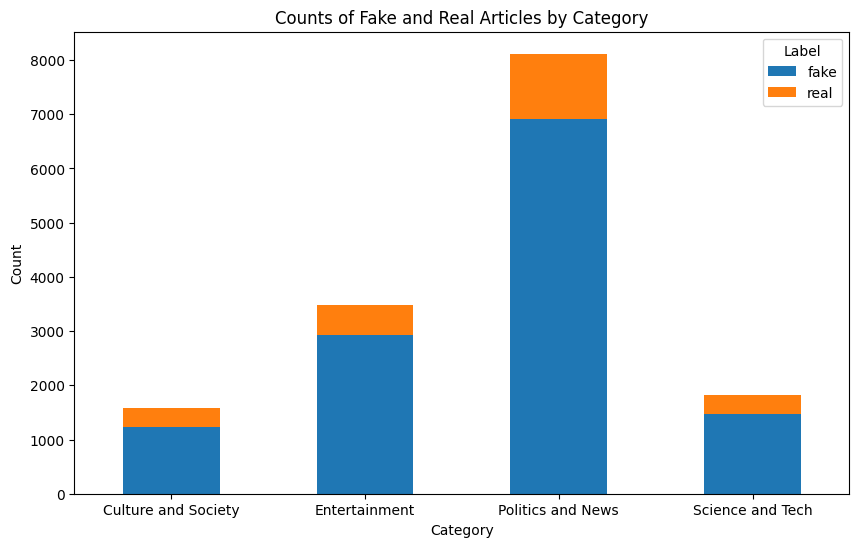

In [ ]:
plot_data(df)

# Looks like very few real articles. Add more real articles

In [ ]:
# read all real articles from this dataset
# Data_Train.csv contians all real articles with categories -
# {0: "Politics", 1: "Technology", 2:"Entertainment", 3:"Business"}
# Use these articles and add to previous dataframe

def read_file2():
  df_2 = pd.read_csv('Data_Train.csv', encoding='cp1252')
  df_2 = df_2.dropna()
  df_2['category'] = df_2['SECTION']
  df_2['text'] = df_2['STORY']
  df_2['label'] = 1

  class_remap = {0: 1, 1: 3, 2:0, 3: 3}
  df_2['category'] = df_2['category'].map(class_remap)

  df_2 = df_2.dropna()
  df_2['category'] = df_2['category'].astype(int)
  # df_2 = df_2[df_2['category']!=1]
  df_2.drop(columns=['STORY','SECTION'], inplace=True)

  return df_2

In [ ]:
df_2 = read_file2()
df_2['category'].value_counts()

category
3    4018
0    1924
1    1686
Name: count, dtype: int64

In [ ]:
df = pd.concat([df, df_2])

# Total Data Check Stage-2

label                fake  real
category                       
Culture and Society  1223   352
Entertainment        2927  2480
Politics and News    6911  2890
Science and Tech     1472  4359


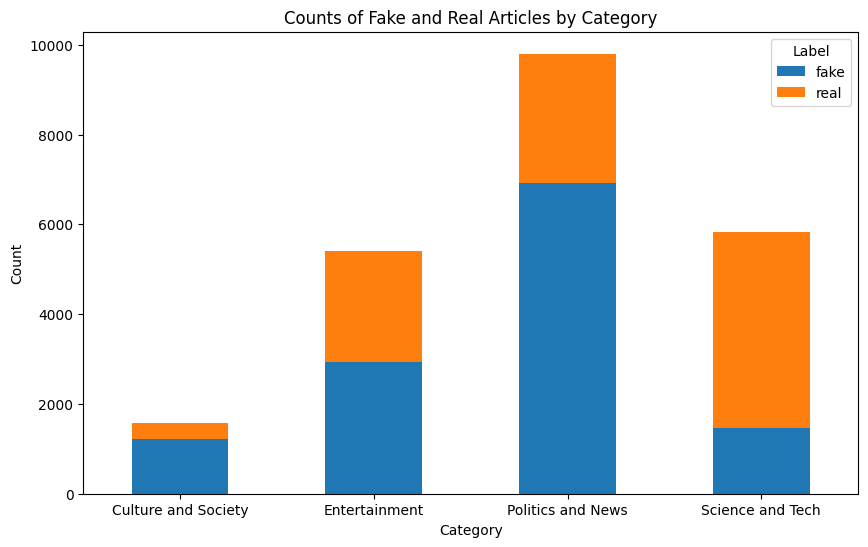

In [ ]:
plot_data(df)

## Let's boost entertainment and science&tech categories by capturing real articles that belong to these categories from the next dataset

In [ ]:
# train_ag_news.csv contains All real articles with various categories.

# We will consider sports as entertainment and fetch 3000 articles  into our
# current data frame

# We will fetch 1500 articles from business, 1500 articles from science and
# add these 3000 articles into our current dataframe's Science and Tech category

def read_file3():

  df_ag = pd.read_csv("train_agnews.csv")

  df_ag['category'] = df_ag['Class Index']
  df_ag['text'] = df_ag['Title'] + ' ' + df_ag['Description']
  df_ag.drop(columns=['Title','Description','Class Index'], inplace=True)
  df_ag['label'] = 1

  df_ag_sports = df_ag[df_ag['category'] == 2][:3000]
  df_ag_sports['category'] = 0

  df_ag = pd.read_csv("train_agnews.csv")

  df_ag['category'] = df_ag['Class Index']
  df_ag['text'] = df_ag['Title'] + ' ' + df_ag['Description']
  df_ag.drop(columns=['Title','Description','Class Index'], inplace=True)
  df_ag['label'] = 1

  df_ag_business = df_ag[df_ag['category'] == 3][:250]
  df_ag_business['category'] = 3

  df_ag = pd.read_csv("train_agnews.csv")

  df_ag['category'] = df_ag['Class Index']
  df_ag['text'] = df_ag['Title'] + ' ' + df_ag['Description']
  df_ag.drop(columns=['Title','Description','Class Index'], inplace=True)
  df_ag['label'] = 1

  df_ag_science = df_ag[df_ag['category'] == 4][:250]
  df_ag_science['category'] = 3

  df_ag = pd.read_csv("train_agnews.csv")

  df_ag['category'] = df_ag['Class Index']
  df_ag['text'] = df_ag['Title'] + ' ' + df_ag['Description']
  df_ag.drop(columns=['Title','Description','Class Index'], inplace=True)
  df_ag['label'] = 1

  df_ag_politics = df_ag[df_ag['category'] == 1][:2000]
  df_ag_politics['category'] = 1

  return pd.concat([df_ag_sports, df_ag_politics, df_ag_business, df_ag_science])


In [ ]:
df_3 = read_file3()
df_3['category'].value_counts()

category
0    3000
1    2000
3     500
Name: count, dtype: int64

In [ ]:
df = pd.concat([df,df_3])

# Total Data Check Stage-3

label                fake  real
category                       
Culture and Society  1223   352
Entertainment        2927  5480
Politics and News    6911  4890
Science and Tech     1472  4859


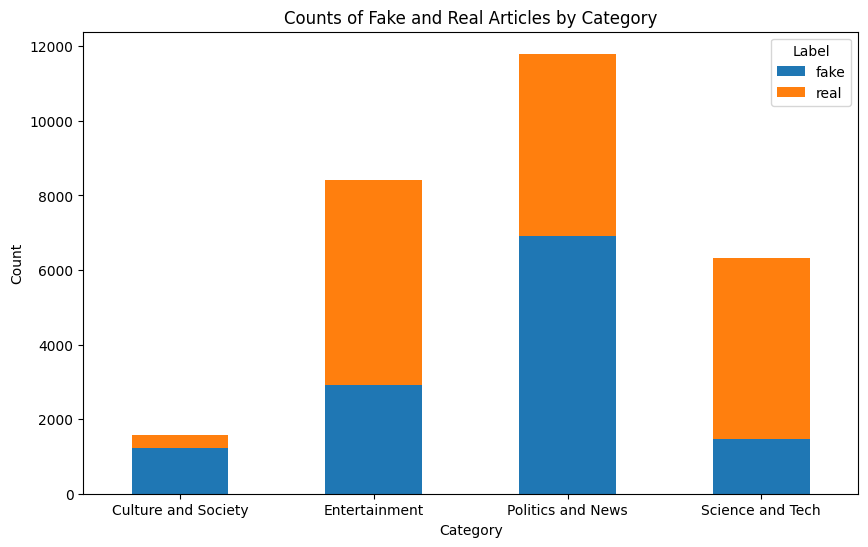

In [ ]:
plot_data(df)

In [ ]:
# Let's try to boost culture and society category by fetching all real articles found related to this category

In [ ]:
def read_file4():
  df_4 = pd.read_csv("news-article-categories.csv")
  df_4['text'] = df_4['title'] + ' ' + df_4['body']
  df_4.drop(columns=['body','title'], inplace=True)

  culture_categories = ['ARTS & CULTURE', 'WOMEN', 'RELIGION']
  tech_categories = ["BUSINESS", "SCIENCE", "TECH", "ENVIRONMENT"]
  entertainment_categories = ["ENTERTAINMENT", "COMEDY", "MEDIA"]

  tmp_cat_map = {
      'ARTS & CULTURE': 2, 'WOMEN': 2, "RELIGION":2, "BUSINESS": 3, "SCIENCE": 3, "TECH":3, "ENVIRONMENT":3,
      "ENTERTAINMENT":0, "COMEDY":0, "MEDIA":0
  }
  df_4 = df_4[df_4['category'].isin(culture_categories + tech_categories + entertainment_categories)]
  df_4['category'] = df_4['category'].map(tmp_cat_map)

  return df_4
# def read_file4():
#   df_arts_main = pd.read_csv("news-article-categories.csv")
#   df_arts_main['text'] = df_arts_main['title'] + ' ' + df_arts_main['body']
#   df_arts_main.drop(columns=['body','title'], inplace=True)
#   df_arts = df_arts_main[df_arts_main['category'] == "ARTS & CULTURE"]
#   df_arts2 = df_arts_main[df_arts_main['category'] == "WOMEN"]
#   df_arts3 = df_arts_main[df_arts_main['category'] == "RELIGION"]
#   df_arts_main = pd.concat([df_arts, df_arts2, df_arts3], ignore_index=True)
#   df_arts_main['category'] = 2
#   df_arts_main['label'] = 1

#   return df_arts_main

In [ ]:
df_4 = read_file4()
df_4
df_4['category'].value_counts()

category
2    2004
3    1853
0    1228
Name: count, dtype: int64

In [ ]:
df = pd.concat([df,df_4])

# Total Data Check Stage-4

label                fake  real
category                       
Culture and Society  1223   352
Entertainment        2927  5480
Politics and News    6911  4890
Science and Tech     1472  4859


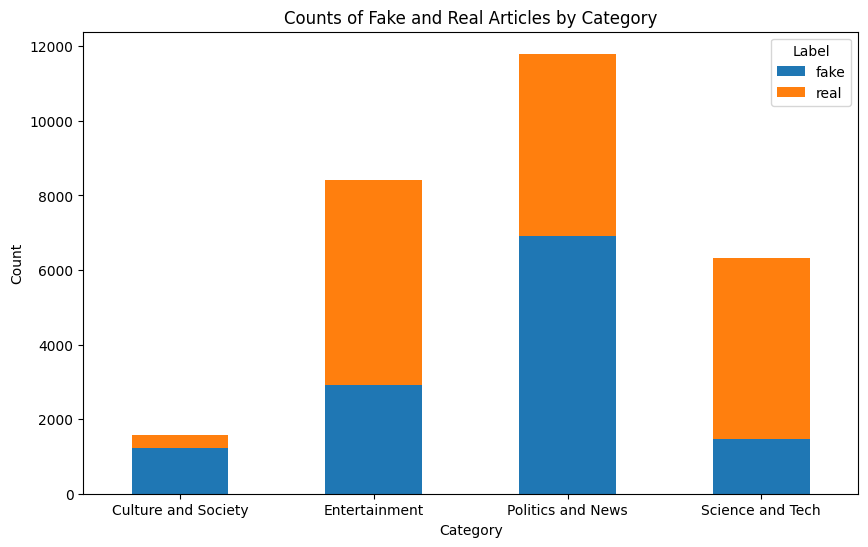

In [ ]:
plot_data(df)

In [ ]:
def read_file5():
  df_5 = pd.read_csv('politifact_phase2_raw_2018_7_3 2.csv', on_bad_lines = 'warn')
  df_5.drop_duplicates(inplace=True)
  df_5 = df_5[['fact_tag_phase1', 'article_title_phase1', 'article_claim_phase1', 'article_categories_phase1' ]]
  df_5['text'] = df_5['article_title_phase1'] + ' ' + df_5['article_claim_phase1']
  df_5['label'] = df_5['fact_tag_phase1']
  df_5['category'] = df_5['article_categories_phase1']

  df_5.drop(columns=['fact_tag_phase1', 'article_claim_phase1', 'article_title_phase1', 'article_categories_phase1'], inplace=True)
  df_5['category'] = df_5['category'].str.lower().str.strip()

  society = ['hate', 'population', 'drugs', 'ethics', 'gays', 'crime', 'candidate biography', 'history', 'poverty', 'corrections and updates', 'health care', 'rebellion', 'language', 'superstition', 'culture', 'society', 'guns', 'racial', 'racist', 'violence', 'religion', 'history', 'fraud', 'abortion', 'agriculture','medical', 'medicaid', 'medicare', 'health']
  pattern = '|'.join(society)
  contains_society = df_5['category'].str.contains(pattern, case=False)

  df_5.loc[contains_society, 'category'] = 'culture and society'

  # politics_values = ['politics', 'september 11th', 'war', 'military', 'war', 'immigration', 'hurricane', 'fake news', 'affairs', 'legal', 'media matters', 'politicians', 'elections', 'ballot box']
  # pattern = '|'.join(politics_values)
  # contains_politics = df_5['category'].str.contains(pattern, case=False)
  # df_5.loc[contains_politics, 'category'] = 'politics and news'


  business_values = ['business', 'tech', 'automobiles', 'energy','invest', 'science', 'medical', 'technology', 'computers']
  pattern = '|'.join(business_values)
  contains_business = df_5['category'].str.contains(pattern, case=False)
  df_5.loc[contains_business, 'category'] = 'science and tech'

  entertainment_values = ['viral', 'weddings', 'cokelore', 'job', 'critter', 'pop culture', 'food', 'lost legends', 'controversy', 'embarrassments', 'glurge', 'sexuality', 'wives', 'travel', 'soapbox', 'humor', 'fauxtography','entertainment','sports', 'viral', 'college', 'quotes', 'conspiracy', 'holidays', 'food', 'quotes', 'horror', 'disney', 'computers', 'medical', 'entertainment', 'medicaid', 'medicare', 'health']
  pattern = '|'.join(entertainment_values)
  contains_entertainment = df_5['category'].str.contains(pattern, case=False)
  df_5.loc[contains_entertainment, 'category'] = 'entertainment'


  class_labels = {'entertainment':0, 'politics and news': 1, 'culture and society':2, 'science and tech':3}
  df_5['category'] = df_5['category'].map(class_labels)
  label_map = {'FALSE' : 0, 'Mostly False':0, 'Pants on Fire!':0, 'Half-True':2, 'TRUE':1, 'Mostly True': 1 }
  df_5['label'] = df_5['label'].map(label_map)

  df_5 = df_5[df_5['category'].isin([0,1,2,3])]
  df_5 = df_5[df_5['label'].isin([0,1])]

  df_5.dropna(how="any")

  df_5['label'] = df_5['label'].astype('int')
  df_5['category'] = df_5['category'].astype('int')

  return df_5

In [ ]:
df_5 = read_file5()

Skipping line 23797: expected 16 fields, saw 18



In [ ]:
df_5['category'].value_counts()

category
2    10004
0     1175
3      865
Name: count, dtype: int64

In [ ]:
df_5['label'].value_counts()

label
0    7438
1    4606
Name: count, dtype: int64

In [ ]:
df = pd.concat([df,df_5])

label                fake  real
category                       
Culture and Society  7508  4071
Entertainment        3551  6031
Politics and News    6911  4890
Science and Tech     2001  5195


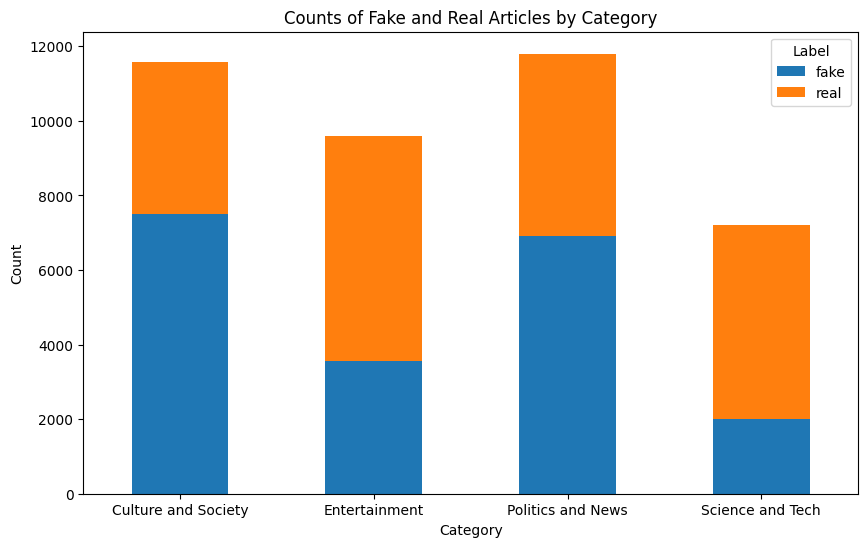

In [ ]:
plot_data(df)

In [ ]:
# add synthetic data
df_6 = pd.read_csv("entertainment_fake.csv")
df_6 = df_6.dropna(how='any')
df_6['category'] = 0
df_6['label'] = 0

In [ ]:
df_7 = pd.read_csv("science&tech_fake.csv")
df_7 = df_7.dropna(how='any')
df_7['category'] = 3
df_7['label'] = 0

In [ ]:
df_6['category'].value_counts()

category
0    2251
Name: count, dtype: int64

In [ ]:
df_7['category'].value_counts()

category
3    2500
2       1
Name: count, dtype: int64

In [ ]:
df = pd.concat([df,df_6,df_7])

label                fake  real
category                       
Culture and Society  7508  4071
Entertainment        5802  6031
Politics and News    6911  4890
Science and Tech     4502  5195


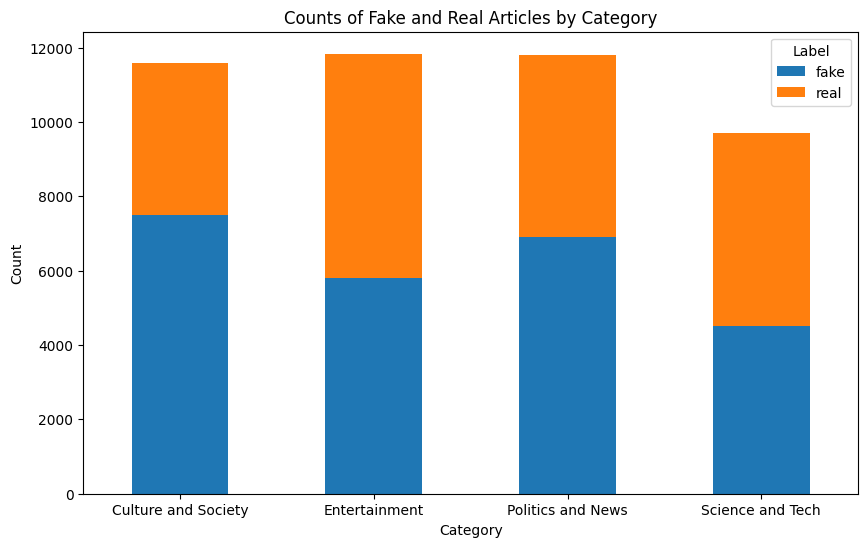

In [ ]:
plot_data(df)

In [ ]:
# drop 1500 politics fake articles
politics_rows = df[(df['category'] == 1) & (df['label'] == 0)]
# Get a random sample of 1500 rows
rows_to_remove = politics_rows.sample(1500)
# Remove the selected rows from the original DataFrame
df = df.drop(rows_to_remove.index)

# drop 3000 culture&society fake articles
culture_rows = df[(df['category'] == 2) & (df['label'] == 0)]
# Get a random sample of 1500 rows
rows_to_remove = culture_rows.sample(3000)
# Remove the selected rows from the original DataFrame
df = df.drop(rows_to_remove.index)

label                fake  real
category                       
Culture and Society  4185  3905
Entertainment        5482  5331
Politics and News    5100  4453
Science and Tech     4277  4699


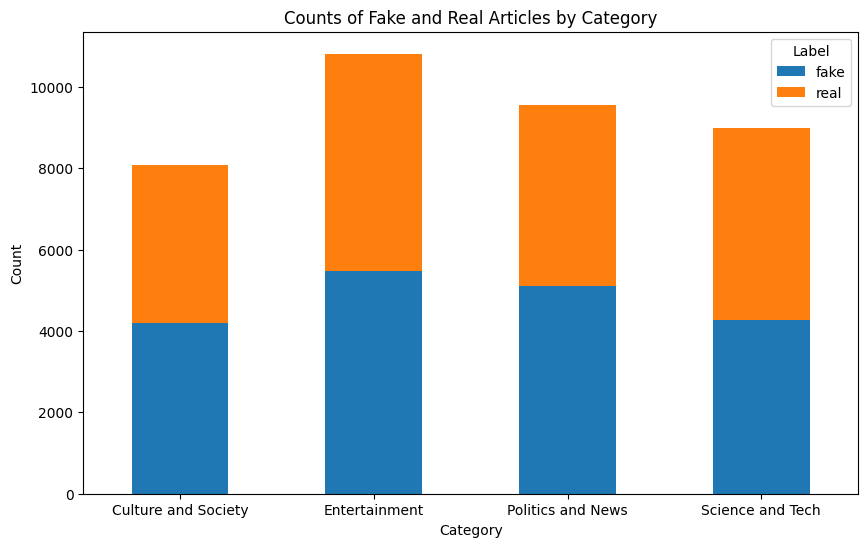

In [ ]:
plot_data(df)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['label'] = df['label'].astype('int')

In [ ]:
df['label'].value_counts()

label
0    19044
1    18388
Name: count, dtype: int64

In [ ]:
df.to_csv('final_dataset.csv', header=True, index=False)